In [25]:
import brainlit
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from brainlit.algorithms.regression import *

# Tutorial for running the log-regression classifiers on extracted features

Loading extracted neighborhood features from csv file(This file will be changed to include the whole data).<br />
The neighborhood here is a 4x4x4 with 64 features.

In [28]:
output_feats = "intensity2.csv" ##File will be changed to include larger dataset
df_iter = pd.read_csv(output_feats, header=None)
df_iter = df_iter.dropna()
print (df_iter)
n_features = df_iter.shape[1] - 1
X_all = df_iter.iloc[:, :n_features]
y_all = df_iter.iloc[:, n_features:]

            0       1       2    3
0      8335.0  6084.0  5265.0  1.0
2      8350.0  6099.0  5280.0  0.0
4      8288.0  6101.0  5270.0  1.0
6      8303.0  6116.0  5285.0  0.0
8      8277.0  6129.0  5272.0  1.0
...       ...     ...     ...  ...
21590  5821.0  3730.0  4754.0  0.0
21592  5760.0  3717.0  4757.0  1.0
21594  5775.0  3732.0  4772.0  0.0
21596  5753.0  3722.0  4774.0  1.0
21598  5768.0  3737.0  4789.0  0.0

[10800 rows x 4 columns]


Normalizing and splitting the dataset

In [29]:
X_all = StandardScaler().fit_transform(X_all)
X_sel, X_test, y_sel, y_test = train_test_split(
    X_all, y_all, test_size=200, random_state=42)

Setting up classifiers to train:<br />
1) Multilayer Perceptron with 4 hiddenlayer, all layers having sigmoid activation.<br />
2) Simple Logistic Regression classifier<br />
3) Two layer Neural Network with output Logistic Regression layer with sigmoid activation and input layer is a fullyconnected layer with ReLU activation.<br />

In [21]:
classifiers = [
    MLPClassifier(hidden_layer_sizes=4, activation="logistic", alpha=1, max_iter=1000),
    LogisticRegression(max_iter=2000),
    MLP_LR_NN(X_sel, y_sel, n_features),
]

C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Running the classifiers on the train and test data to get accuracy of each classifier.<br />
The accuracy, train time, test time, classifier name and number of iteration is stored in a csv file : "test.csv"

In [22]:
names = {"MLP-LR": "black", "LR": "blue", "MLP-relu-LR": "red"}
run_classifiers(
        X_sel, y_sel, X_test, y_test, classifiers, names, filename="test.csv")

  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

200/200 [==============================] - 0s 90us/step


C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  5.71it/s]

 10%|████████▎                                                                          | 1/10 [00:00<00:04,  1.88it/s]

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

200/200 [==============================] - 0s 115us/step


C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  5.73it/s]

 20%|████████████████▌                                                                  | 2/10 [00:01<00:04,  1.88it/s]

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

 33%|████████████████████████████                              

200/200 [==============================] - 0s 111us/step


C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  5.25it/s]

 30%|████████████████████████▉                                                          | 3/10 [00:01<00:03,  1.83it/s]

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

 33%|████████████████████████████                              

200/200 [==============================] - 0s 100us/step


C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  5.15it/s]

 40%|█████████████████████████████████▏                                                 | 4/10 [00:02<00:03,  1.79it/s]

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

 33%|████████████████████████████                              

200/200 [==============================] - 0s 120us/step


C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  4.04it/s]

 50%|█████████████████████████████████████████▌                                         | 5/10 [00:02<00:03,  1.63it/s]

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

 33%|████████████████████████████                              

200/200 [==============================] - 0s 105us/step


C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  3.86it/s]

 60%|█████████████████████████████████████████████████▊                                 | 6/10 [00:03<00:02,  1.50it/s]

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

 33%|████████████████████████████                              

200/200 [==============================] - 0s 95us/step


C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  4.78it/s]

 70%|██████████████████████████████████████████████████████████                         | 7/10 [00:04<00:01,  1.53it/s]

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

200/200 [==============================] - 0s 100us/step


C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  5.81it/s]

 80%|██████████████████████████████████████████████████████████████████▍                | 8/10 [00:04<00:01,  1.62it/s]

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

 33%|████████████████████████████                              

200/200 [==============================] - 0s 105us/step


C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  4.61it/s]

 90%|██████████████████████████████████████████████████████████████████████████▋        | 9/10 [00:05<00:00,  1.59it/s]

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

 33%|████████████████████████████                              

200/200 [==============================] - 0s 95us/step


C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  4.55it/s]

  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

200/200 [==============================] - 0s 120us/step


C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  3.95it/s]

 10%|████████▎                                                                          | 1/10 [00:00<00:06,  1.31it/s]

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

200/200 [==============================] - 0s 92us/step


C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  4.10it/s]

 20%|████████████████▌                                                                  | 2/10 [00:01<00:06,  1.32it/s]

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

200/200 [==============================] - 0s 110us/step


C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  3.72it/s]

 30%|████████████████████████▉                                                          | 3/10 [00:02<00:05,  1.29it/s]

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

200/200 [==============================] - 0s 90us/step


C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  3.23it/s]

 40%|█████████████████████████████████▏                                                 | 4/10 [00:03<00:04,  1.22it/s]

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

200/200 [==============================] - 0s 95us/step


C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  3.09it/s]

 50%|█████████████████████████████████████████▌                                         | 5/10 [00:04<00:04,  1.15it/s]

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

200/200 [==============================] - 0s 95us/step


C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  3.64it/s]

 60%|█████████████████████████████████████████████████▊                                 | 6/10 [00:05<00:03,  1.17it/s]

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

200/200 [==============================] - 0s 100us/step


C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  4.00it/s]

 70%|██████████████████████████████████████████████████████████                         | 7/10 [00:05<00:02,  1.21it/s]

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

200/200 [==============================] - 0s 100us/step


C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  3.98it/s]

 80%|██████████████████████████████████████████████████████████████████▍                | 8/10 [00:06<00:01,  1.24it/s]

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

200/200 [==============================] - 0s 92us/step


C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  4.07it/s]

 90%|██████████████████████████████████████████████████████████████████████████▋        | 9/10 [00:07<00:00,  1.27it/s]

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

200/200 [==============================] - 0s 95us/step


C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  3.92it/s]

  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

200/200 [==============================] - 0s 90us/step


C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.07s/it]

 10%|████████▎                                                                          | 1/10 [00:03<00:28,  3.21s/it]

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

200/200 [==============================] - 0s 118us/step


C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.07s/it]

 20%|████████████████▌                                                                  | 2/10 [00:06<00:25,  3.22s/it]

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

200/200 [==============================] - 0s 89us/step


C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.10s/it]

 30%|████████████████████████▉                                                          | 3/10 [00:09<00:22,  3.24s/it]

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

 33%|████████████████████████████                              

200/200 [==============================] - 0s 90us/step


C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.11s/it]

 40%|█████████████████████████████████▏                                                 | 4/10 [00:13<00:19,  3.27s/it]

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

200/200 [==============================] - 0s 90us/step


C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.11s/it]

 50%|█████████████████████████████████████████▌                                         | 5/10 [00:16<00:16,  3.28s/it]

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

200/200 [==============================] - 0s 100us/step


C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.14s/it]

 60%|█████████████████████████████████████████████████▊                                 | 6/10 [00:19<00:13,  3.32s/it]

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

 33%|████████████████████████████                              

200/200 [==============================] - 0s 184us/step


C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.12s/it]

 70%|██████████████████████████████████████████████████████████                         | 7/10 [00:23<00:10,  3.34s/it]

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

 33%|████████████████████████████                              

200/200 [==============================] - 0s 120us/step


C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.17s/it]

 80%|██████████████████████████████████████████████████████████████████▍                | 8/10 [00:26<00:06,  3.39s/it]

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

200/200 [==============================] - 0s 95us/step


C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.13s/it]

 90%|██████████████████████████████████████████████████████████████████████████▋        | 9/10 [00:30<00:03,  3.39s/it]

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

200/200 [==============================] - 0s 91us/step


C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.08s/it]

  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

 33%|████████████████████████████                              

200/200 [==============================] - 0s 125us/step


C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:29<00:00,  9.72s/it]

 10%|████████▎                                                                          | 1/10 [00:29<04:22, 29.18s/it]

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

 33%|████████████████████████████                              

200/200 [==============================] - 0s 125us/step


C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:29<00:00,  9.91s/it]

 20%|████████████████▌                                                                  | 2/10 [00:58<03:54, 29.35s/it]

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

 33%|████████████████████████████                              

200/200 [==============================] - 0s 99us/step


C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:26<00:00,  8.69s/it]

 30%|████████████████████████▉                                                          | 3/10 [01:24<03:18, 28.36s/it]

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

 33%|████████████████████████████                              

200/200 [==============================] - 0s 90us/step


C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:31<00:00, 10.50s/it]

 40%|█████████████████████████████████▏                                                 | 4/10 [01:56<02:55, 29.30s/it]

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

 33%|████████████████████████████                              

200/200 [==============================] - 0s 105us/step


C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:26<00:00,  9.00s/it]

 50%|█████████████████████████████████████████▌                                         | 5/10 [02:23<02:23, 28.61s/it]

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

 33%|████████████████████████████                              

200/200 [==============================] - 0s 128us/step


C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:27<00:00,  9.22s/it]

 60%|█████████████████████████████████████████████████▊                                 | 6/10 [02:51<01:53, 28.33s/it]

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

 33%|████████████████████████████                              

200/200 [==============================] - 0s 98us/step


C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:29<00:00,  9.77s/it]

 70%|██████████████████████████████████████████████████████████                         | 7/10 [03:20<01:25, 28.62s/it]

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

 33%|████████████████████████████                              

200/200 [==============================] - 0s 95us/step


C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:27<00:00,  9.22s/it]

 80%|██████████████████████████████████████████████████████████████████▍                | 8/10 [03:48<00:56, 28.34s/it]

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

 33%|████████████████████████████                              

200/200 [==============================] - 0s 97us/step


C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:28<00:00,  9.57s/it]

 90%|██████████████████████████████████████████████████████████████████████████▋        | 9/10 [04:16<00:28, 28.45s/it]

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

 33%|████████████████████████████                              

200/200 [==============================] - 0s 105us/step


C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:27<00:00,  9.28s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [05:32<00:00, 83.10s/it]


'test.csv'

The data from "test.csv" can be plotted using the plot_data function as follows

In [23]:
fig,ax = plot_data("test.csv", names, "Accuracy", "Accuracy", "MLP-LR vs LR classification")

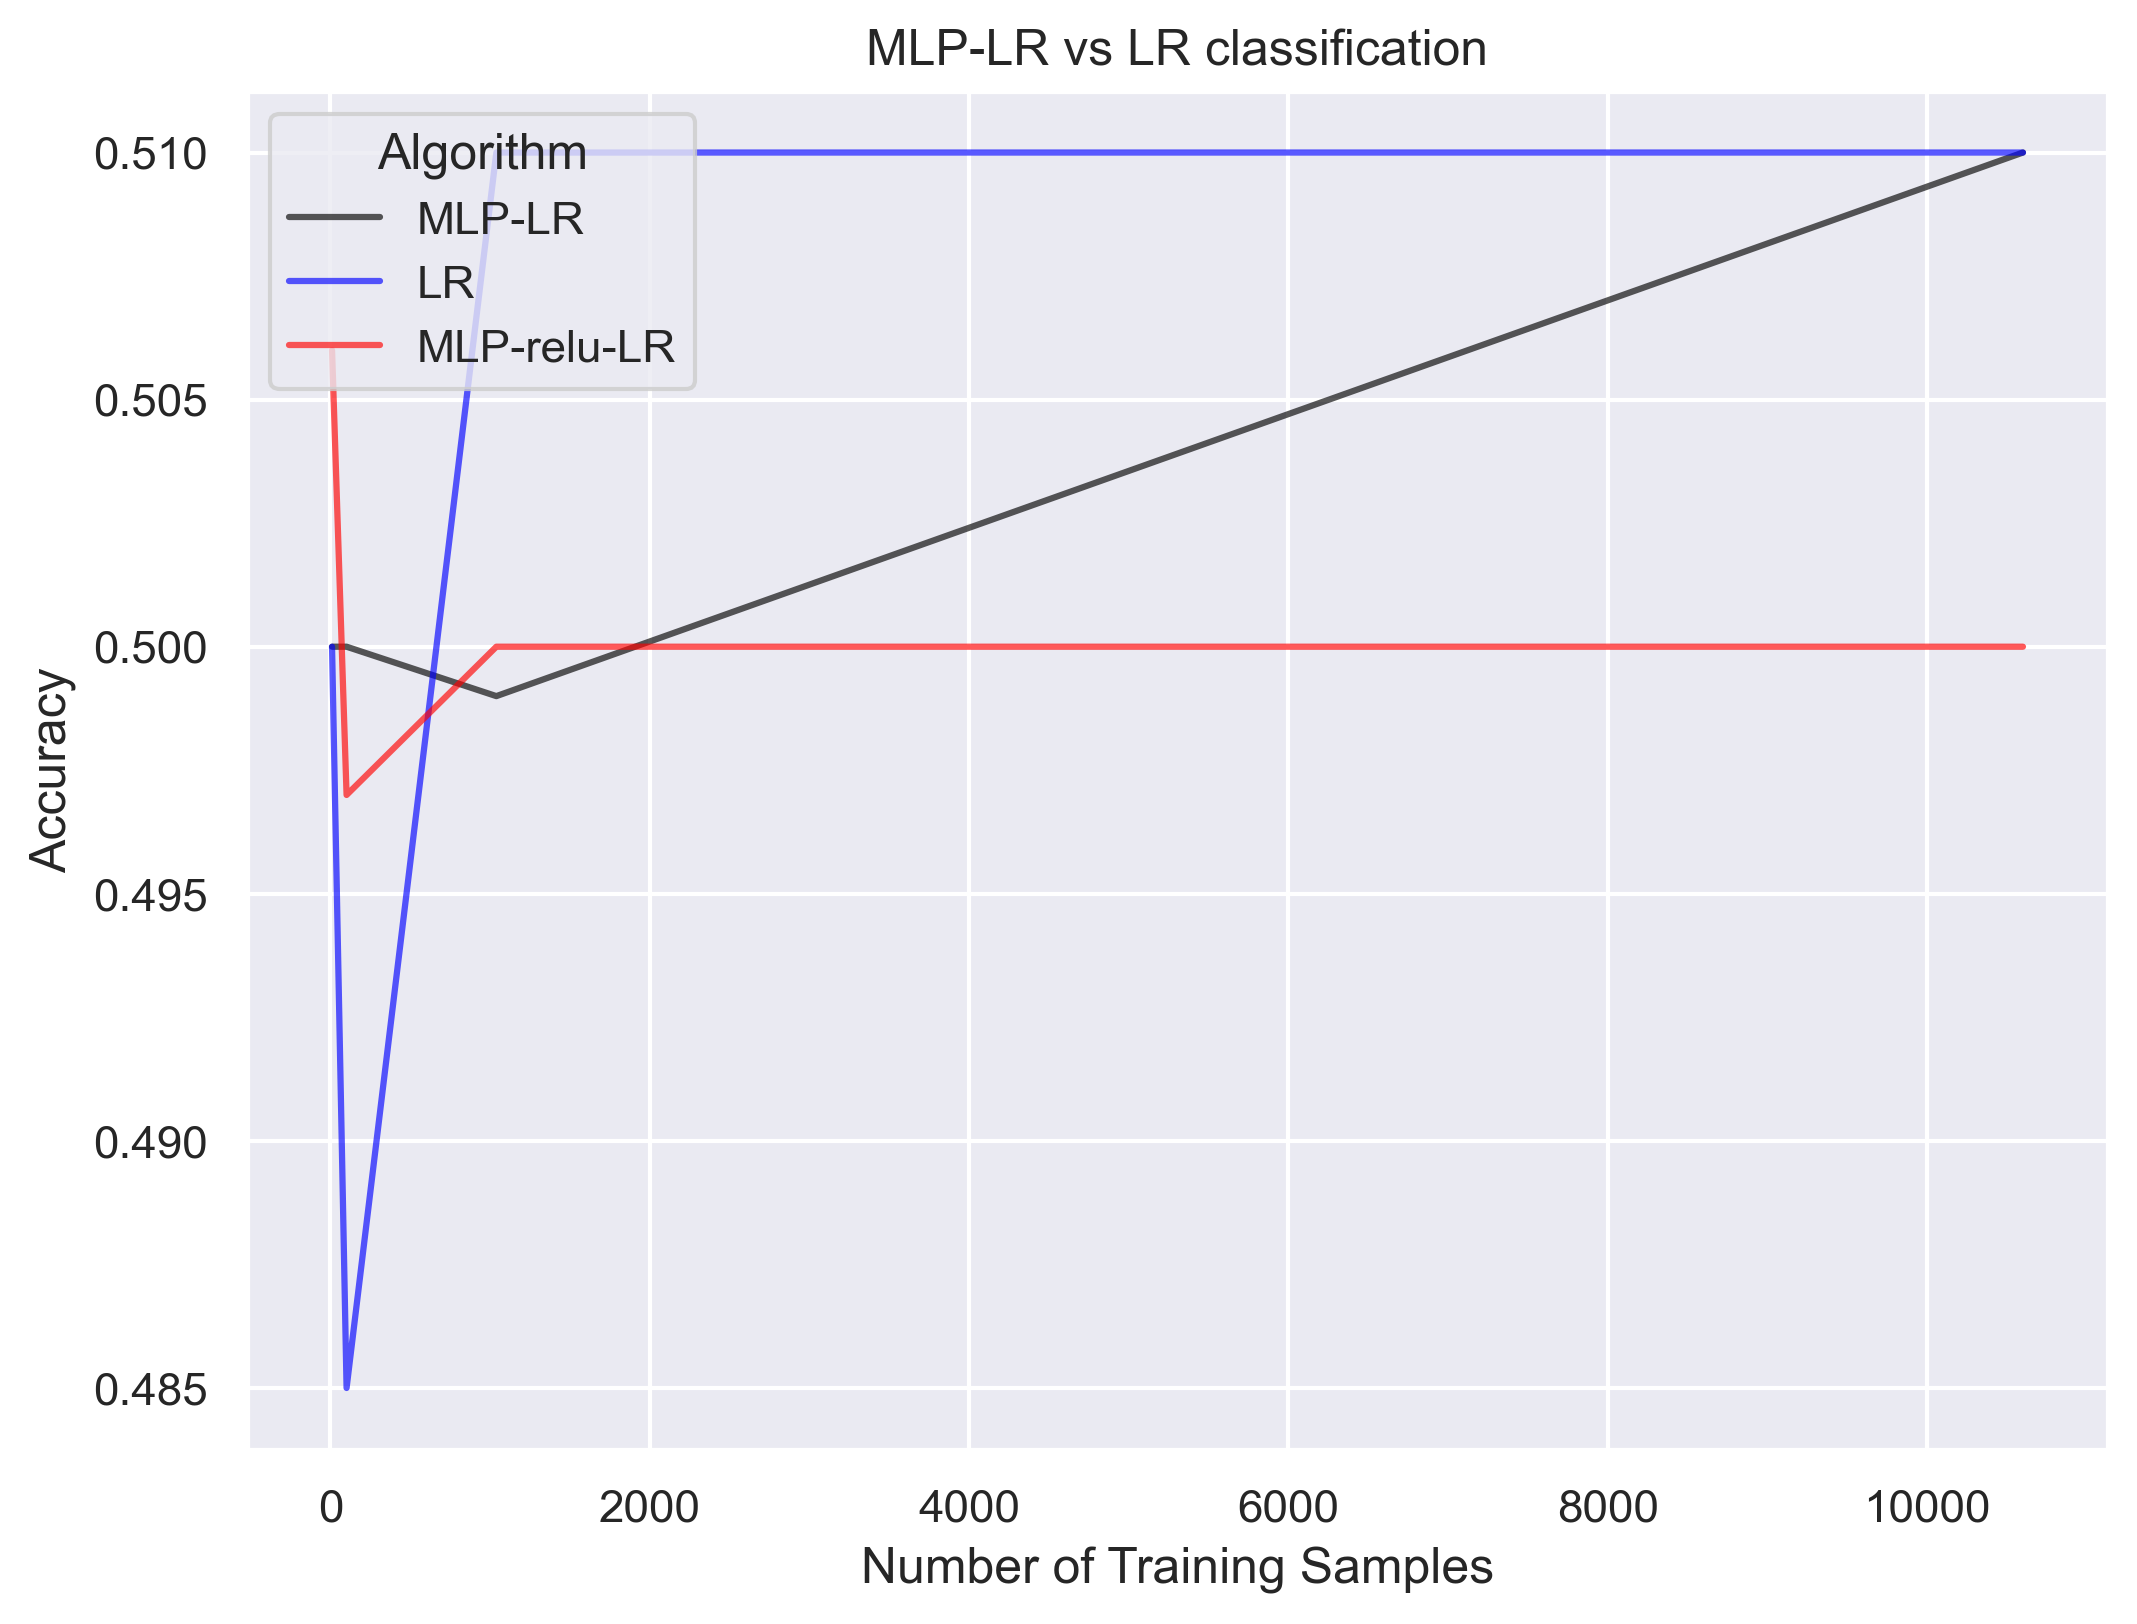

In [24]:
fig